<h1 align="center"><a href="https://github.com/sborquez/gerumo/">*</a> GeRUMo - Gamma-ray Events Reconstructor with Uncertain models</h1>

<h2 align="center">Ensemble evaluation</h2>

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/2/2f/Cta_concept.jpg" width="30%" alt="icon"></img>
</center>


## Setup

Change directory to gerumo repository.

In [1]:
%cd  ..

/mnt/d/sebas/Projects/gerumo


# Load Gerumo framework

In [81]:
from gerumo import *

import pprint
from sklearn.metrics import r2_score
from ipywidgets import interact, fixed
%matplotlib inline

# Angular Reconstruction

In [3]:
ensemble_config_file = "/mnt/e/projects/gerumo-results/baseline/alt_az/CD_ASSEMBLER_EVALUATIONS/CD_Assembler_Tight_evaluation/CD_Assembler_Tight.json"

In [93]:
# Load configuration and models
config, ensembler = load_assembler_from_configuration(ensemble_config_file, assemblers=ASSEMBLERS);
# Load configuration dataset
ret = load_dataset_from_assembler_configuration(ensemble_config_file, include_samples_dataset=True)
(generator, dataset), (sample_generator, sample_dataset, telescopes) = ret
# Load Target configuration
target_mode_config = get_target_mode_config(config)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Mangled names are not yet supported by AutoGraph
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Mangled names are not yet supported by AutoGraph
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Mangled names are not yet supported by AutoGraph
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Mangled names are not yet supported by AutoGraph
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and 

/home/rei/miniconda3/envs/gerumo/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.23.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


## Dataset Sample

In [75]:
print("Test dataset")
describe_dataset(dataset)

Test dataset
files 20
events 8005
observations 32864
obsevation by telescopes
MST_FlashCam     19465
SST1M_DigiCam    10498
LST_LSTCam        2901
Name: type, dtype: int64


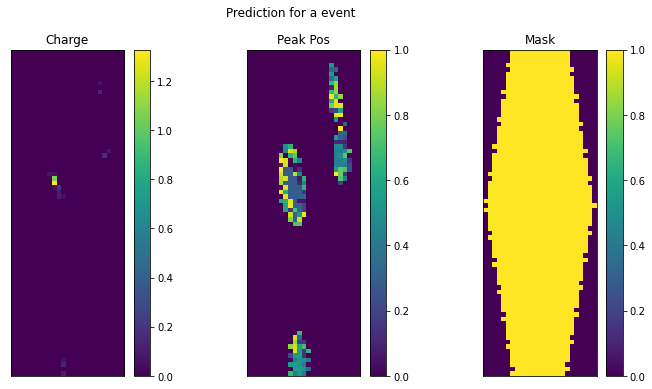

In [70]:
x_batch, y_batch, meta_batch = generator[1]
# event i: 0
t = telescopes[2]
xit = (x_batch[0][t][0], x_batch[0][t][0]) # (image(n obs, [shift], w, h, channels), telescope_features(n obs, n features))
plot_input_sample(xit[0][0], input_image_mode=config["input_image_mode"], input_features_sample=xit[1][0], make_simple=True)

## Mono Evaluation

In [107]:
results_by_model = {}
inputs_by_model = {}
predictions_by_model = {}
# Telescope Models 
for telescope, telescope_model in ensembler.models.items():
    print(telescope)
    telescope_generator, telescope_dataset = load_dataset_from_configuration(
        config, include_samples_dataset=False, telescope=telescope
    )
    model_evaluation = ensembler.exec_model_evaluate(
        telescope_model, telescope, telescope_generator,
        return_predictions=True, return_inputs=True
    )
    results_by_model[telescope] = model_evaluation[0]
    inputs_by_model[telescope] = model_evaluation[1]
    predictions_by_model[telescope] = model_evaluation[2]

LST_LSTCam


/home/rei/miniconda3/envs/gerumo/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.23.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
100%|██████████| 181/181 [00:46<00:00,  3.89it/s]


MST_FlashCam


/home/rei/miniconda3/envs/gerumo/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.23.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
100%|██████████| 1216/1216 [05:28<00:00,  3.70it/s]


SST1M_DigiCam


/home/rei/miniconda3/envs/gerumo/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.23.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
100%|██████████| 656/656 [02:45<00:00,  3.96it/s]


## Multi-Stereo Evaluation

In [77]:
results, predictions = ensembler.evaluate(generator, return_predictions=True)
results_by_model["Ensemble"] = results
predictions_by_model["Ensemble"] = predictions

100%|██████████| 500/500 [37:54<00:00,  4.55s/it] 


## Angular Resolution

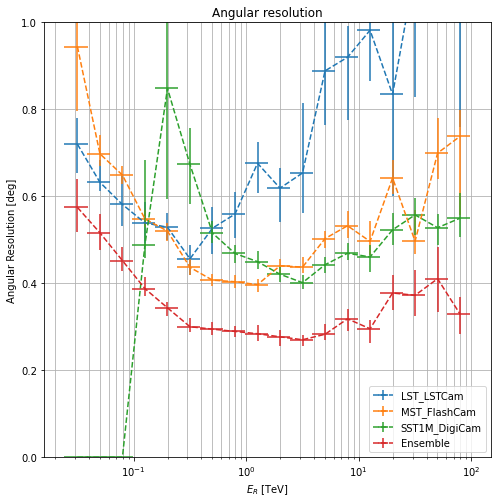

In [111]:
plot_angular_resolution_comparison(results_by_model, ylim=[0, 1], fmts=["--" for k,v in results_by_model.items()])

###  Regression performance

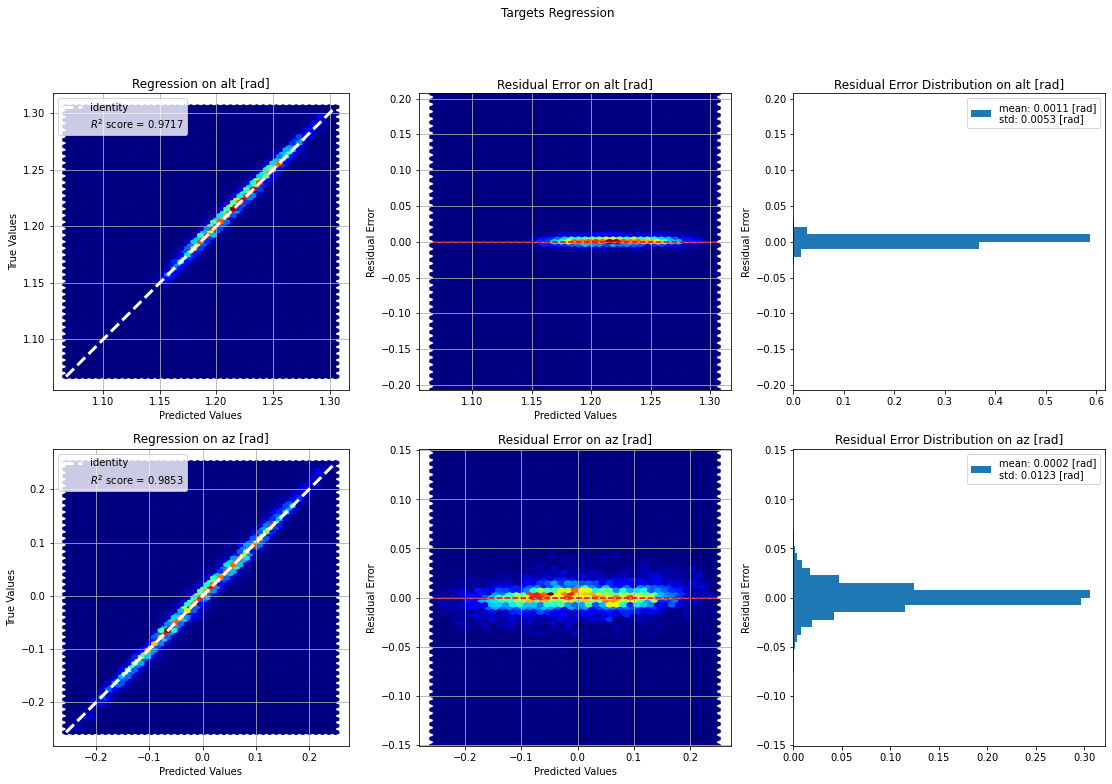

In [82]:
scores = r2_score(
    results[[f"true_{target}" for target in config["targets"]]], 
    results[[f"pred_{target}" for target in config["targets"]]], 
    multioutput="raw_values"
)
plot_regression_evaluation(results, config["targets"], scores)

### Multi-Observer 

In [266]:
interact(
    plot_multi_stereo_reconstruction,
    event_index=(0, len(results)), 
    stereo_results=fixed(results),
    stereo_predictions=fixed(predictions),
    mono_results_by_model=fixed(results_by_model),
    mono_predictions_by_model=fixed(predictions_by_model),
    targets=fixed(config["targets"]),
    target_domains=fixed(target_mode_config["target_domains"]),
    target_resolutions=fixed(target_mode_config["target_resolutions"])
);

interactive(children=(IntSlider(value=4000, description='event_index', max=8000), Output()), _dom_classes=('wi…